In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('laptop_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [3]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [10]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [11]:
df['Inches'].nunique()

18

In [12]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [13]:
(df['OpSys'].value_counts(),df['OpSys'].nunique())

(OpSys
 Windows 10      1072
 No OS             66
 Linux             62
 Windows 7         45
 Chrome OS         27
 macOS             13
 Mac OS X           8
 Windows 10 S       8
 Android            2
 Name: count, dtype: int64,
 9)

In [14]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [15]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

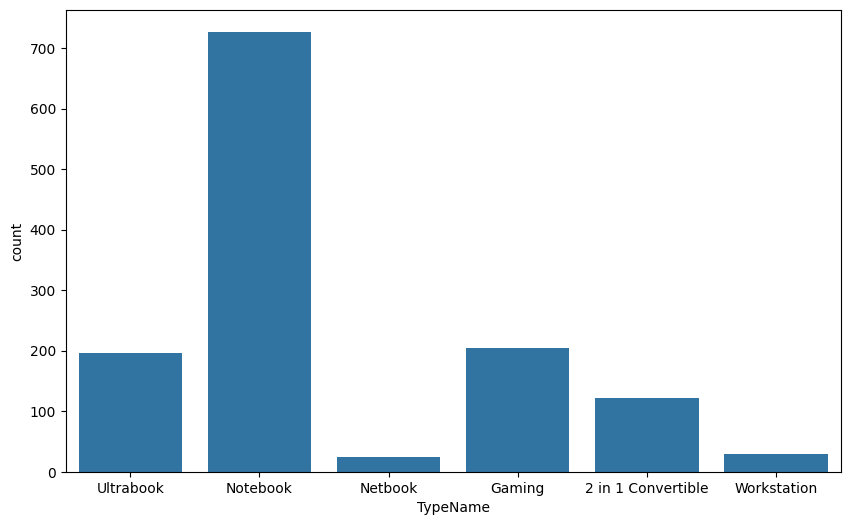

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeName',data=df)
plt.show()

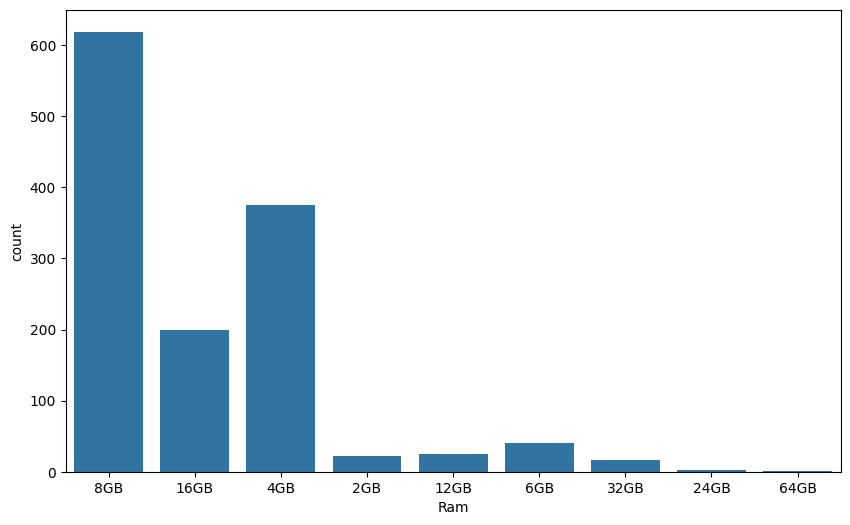

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ram',data=df)
plt.show()

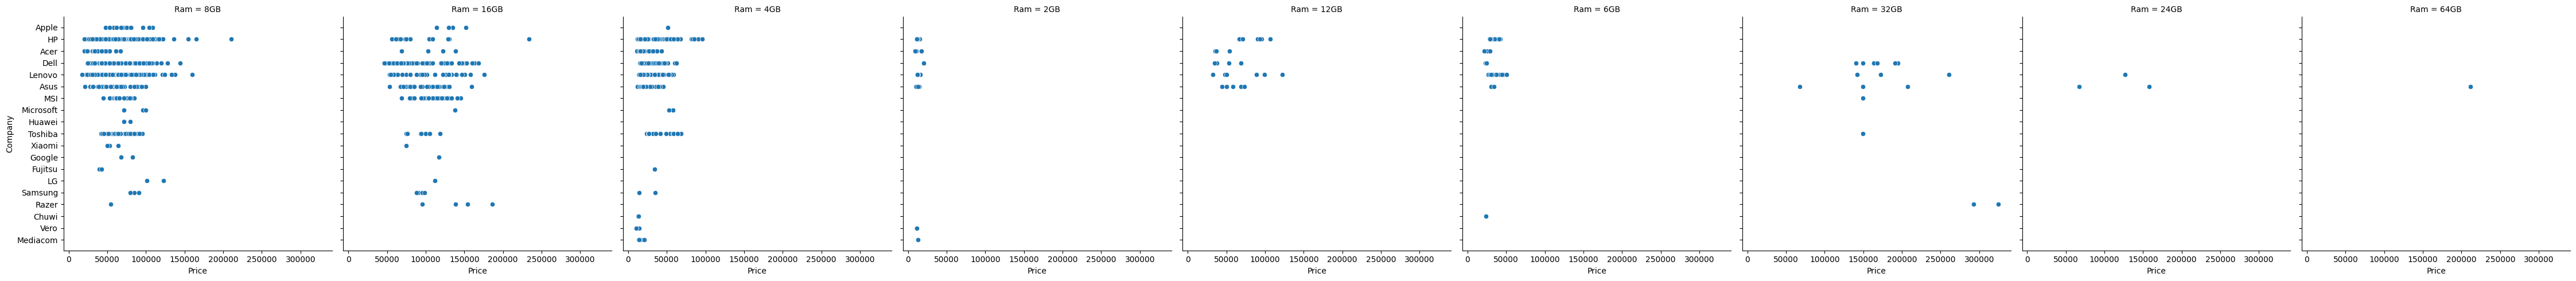

In [18]:
sns.relplot(x='Price',y='Company',col="Ram",data=df)
plt.show()

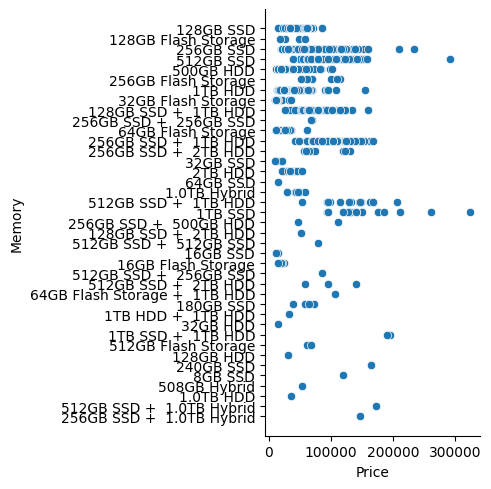

In [19]:
sns.relplot(x='Price',y='Memory',data=df)
plt.show()

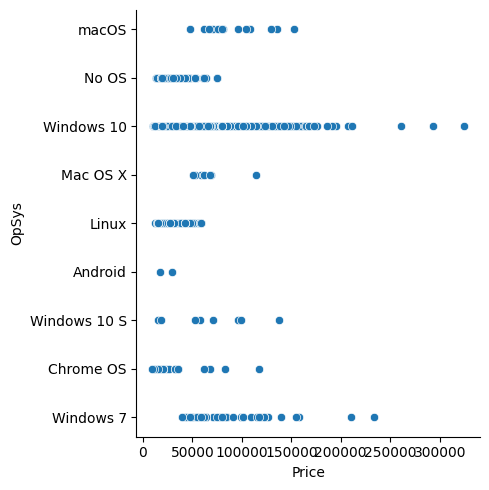

In [20]:
sns.relplot(x='Price',y='OpSys',data=df)
plt.show()

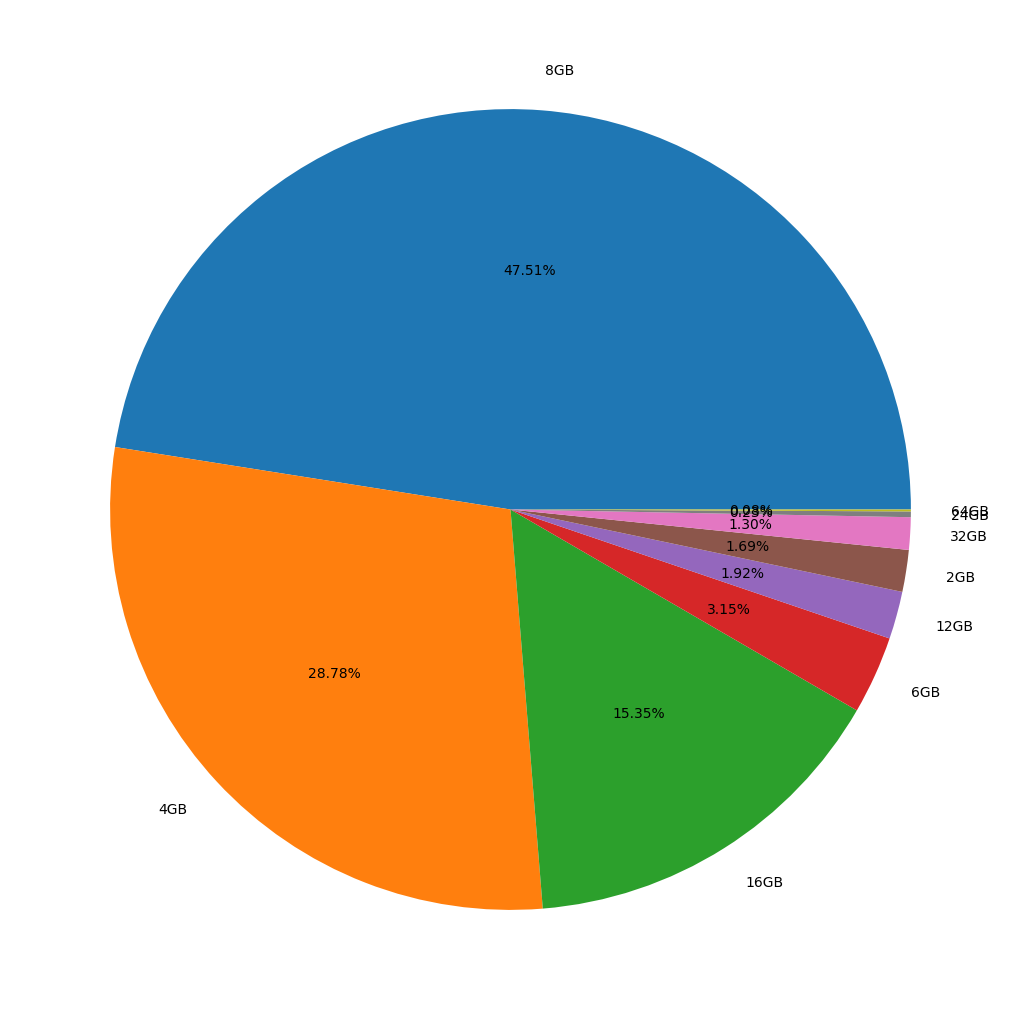

In [21]:
plt.figure(figsize=(20,13))
plt.pie(df['Ram'].value_counts(), labels=df['Ram'].value_counts().index, autopct='%2.2f%%')
plt.show()

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [23]:
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False).astype(float)
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False).astype(float)
df['GHz'] = df['Cpu'].str.extract(r'(\d+(\.\d+)?)GHz')[0].astype(float)
df['Generation'] = df['Cpu'].str.extract(r'Core i(\d+)')[0]
df['Series'] = df['Cpu'].str.extract(r'(A\d+)', expand=False)
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[0]
df['Width'] = df['Resolution'].astype(float)[0]
df['Height'] = df['Resolution'].astype(float)[1]
df = df.drop(columns=['Resolution'])


In [24]:
import re
def convert_to_gb(storage_str):
    conversion_factors = {
        'GB': 1,
        'TB': 1024,
        'Hybrid': 1 
    }
    
    total_gb = 0
    matches = re.findall(r'(\d+(?:\.\d+)?)\s*(GB|TB|Hybrid)', storage_str, re.IGNORECASE)
    for match in matches:
        value, unit = match
        value = float(value)
        unit = unit.upper()
        total_gb += value * conversion_factors.get(unit, 1)
    
    return total_gb

df['StorageGB'] = df['Memory'].apply(convert_to_gb)
df.drop(columns='Memory',inplace=True)
df.drop(columns='Cpu',inplace=True)
df.drop(columns='ScreenResolution',inplace=True)

In [25]:
gpu_mapping = {
    'Intel Iris Plus Graphics 640': 1,
    'Intel HD Graphics 6000': 2,
    'Intel HD Graphics 620': 3,
    'AMD Radeon Pro 455': 4,
    'Intel Iris Plus Graphics 650': 5,
    'AMD Radeon R5': 6,
    'Intel Iris Pro Graphics': 7,
    'Nvidia GeForce MX150': 8,
    'Intel UHD Graphics 620': 9,
    'Intel HD Graphics 520': 10,
    'AMD Radeon Pro 555': 11,
    'AMD Radeon R5 M430': 12,
    'Intel HD Graphics 615': 13,
    'AMD Radeon Pro 560': 14,
    'Nvidia GeForce 940MX': 15,
    'Intel HD Graphics 400': 16,
    'Nvidia GeForce GTX 1050': 17,
    'AMD Radeon R2': 18,
    'AMD Radeon 530': 19,
    'Nvidia GeForce 930MX': 20,
    'Intel HD Graphics': 21,
    'Intel HD Graphics 500': 22,
    'Nvidia GeForce 930MX ': 23,
    'Nvidia GeForce GTX 1060': 24,
    'Nvidia GeForce 150MX': 25,
    'Intel Iris Graphics 540': 26,
    'AMD Radeon RX 580': 27,
    'Nvidia GeForce 920MX': 28,
    'AMD Radeon R4 Graphics': 29,
    'AMD Radeon 520': 30,
    'Nvidia GeForce GTX 1070': 31,
    'Nvidia GeForce GTX 1050 Ti': 32,
    'Nvidia GeForce MX130': 33,
    'AMD R4 Graphics': 34,
    'Nvidia GeForce GTX 940MX': 35,
    'AMD Radeon RX 560': 36,
    'Nvidia GeForce 920M': 37,
    'AMD Radeon R7 M445': 38,
    'AMD Radeon RX 550': 39,
    'Nvidia GeForce GTX 1050M': 40,
    'Intel HD Graphics 515': 41,
    'AMD Radeon R5 M420': 42,
    'Intel HD Graphics 505': 43,
    'Nvidia GTX 980 SLI': 44,
    'AMD R17M-M1-70': 45,
    'Nvidia GeForce GTX 1080': 46,
    'Nvidia Quadro M1200': 47,
    'Nvidia GeForce 920MX ': 48,
    'Nvidia GeForce GTX 950M': 49,
    'AMD FirePro W4190M ': 50,
    'Nvidia GeForce GTX 980M': 51,
    'Intel Iris Graphics 550': 52,
    'Nvidia GeForce 930M': 53,
    'Intel HD Graphics 630': 54,
    'AMD Radeon R5 430': 55,
    'Nvidia GeForce GTX 940M': 56,
    'Intel HD Graphics 510': 57,
    'Intel HD Graphics 405': 58,
    'AMD Radeon RX 540': 59,
    'Nvidia GeForce GT 940MX': 60,
    'AMD FirePro W5130M': 61,
    'Nvidia Quadro M2200M': 62,
    'AMD Radeon R4': 63,
    'Nvidia Quadro M620': 64,
    'AMD Radeon R7 M460': 65,
    'Intel HD Graphics 530': 66,
    'Nvidia GeForce GTX 965M': 67,
    'Nvidia GeForce GTX1080': 68,
    'Nvidia GeForce GTX1050 Ti': 69,
    'Nvidia GeForce GTX 960M': 70,
    'AMD Radeon R2 Graphics': 71,
    'Nvidia Quadro M620M': 72,
    'Nvidia GeForce GTX 970M': 73,
    'Nvidia GeForce GTX 960': 74,
    'Intel Graphics 620': 75,
    'AMD Radeon R5 520': 76,
    'AMD Radeon R7 M440': 77,
    'AMD Radeon R7': 78,
    'Nvidia Quadro M520M': 79,
    'Nvidia Quadro M2200': 80,
    'Nvidia Quadro M2000M': 81,
    'Intel HD Graphics 540': 82,
    'Nvidia Quadro M1000M': 83,
    'AMD Radeon 540': 84,
    'Nvidia GeForce GTX 1070M': 85,
    'Nvidia GeForce GTX1060': 86,
    'Intel HD Graphics 5300': 87,
    'AMD Radeon R5 M420X': 88,
    'AMD Radeon R7 Graphics': 89,
    'Nvidia GeForce 920': 90,
    'Nvidia GeForce 940M': 91,
    'Nvidia GeForce GTX 930MX': 92,
    'AMD Radeon R7 M465': 93,
    'AMD Radeon R3': 94,
    'Nvidia GeForce GTX 1050Ti': 95,
    'AMD Radeon R7 M365X': 96,
    'AMD Radeon R9 M385': 97,
    'Intel HD Graphics 620 ': 98,
    'Nvidia Quadro 3000M': 99,
    'Nvidia GeForce GTX 980 ': 100,
    'AMD Radeon R5 M330': 101,
    'AMD FirePro W4190M': 102,
    'AMD FirePro W6150M': 103,
    'AMD Radeon R5 M315': 104,
    'Nvidia Quadro M500M': 105,
    'AMD Radeon R7 M360': 106,
    'Nvidia Quadro M3000M': 107,
    'Nvidia GeForce 960M': 108,
    'ARM Mali T860 MP4': 109
}

df['GPU_Numeric'] = df['Gpu'].map(gpu_mapping)
df.drop(columns='Gpu',inplace=True)

In [26]:
df['Series'].fillna(0,inplace=True)
df['Series'].isnull().sum()

C:\Users\91830\AppData\Local\Temp\ipykernel_2304\2762112395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Series'].fillna(0,inplace=True)


0

In [27]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'GHz', 'Generation', 'Series', 'Width', 'Height', 'StorageGB',
       'GPU_Numeric'],
      dtype='object')

In [28]:
df['Generation'].isnull().sum()

217

In [29]:
df.fillna({'Generation':1},inplace=True)

In [30]:
df['Generation'].isnull().sum()

0

In [31]:
num_df = df.select_dtypes(exclude='O')
num_df

,Inches,Ram,Weight,Price,GHz,Width,Height,StorageGB,GPU_Numeric
0,13.3,8.0,1.37,71378.6832,2.3,2560.0,1440.0,128.0,1.0
1,13.3,8.0,1.34,47895.5232,1.8,2560.0,1440.0,128.0,2.0
2,15.6,8.0,1.86,30636.0000,2.5,2560.0,1440.0,256.0,3.0
3,15.4,16.0,1.83,135195.3360,2.7,2560.0,1440.0,512.0,4.0
4,13.3,8.0,1.37,96095.8080,3.1,2560.0,1440.0,256.0,5.0
...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,1.80,33992.6400,2.5,2560.0,1440.0,128.0,10.0
1299,13.3,16.0,1.30,79866.7200,2.5,2560.0,1440.0,512.0,10.0
1300,14.0,2.0,1.50,12201.1200,1.6,2560.0,1440.0,64.0,21.0
1301,15.6,6.0,2.19,40705.9200,2.5,2560.0,1440.0,1024.0,101.0


In [32]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,GHz,Generation,Series,Width,Height,StorageGB,GPU_Numeric
0,Apple,Ultrabook,13.3,8.0,macOS,1.37,71378.6832,2.3,5,0,2560.0,1440.0,128.0,1.0
1,Apple,Ultrabook,13.3,8.0,macOS,1.34,47895.5232,1.8,5,0,2560.0,1440.0,128.0,2.0
2,HP,Notebook,15.6,8.0,No OS,1.86,30636.0000,2.5,5,0,2560.0,1440.0,256.0,3.0
3,Apple,Ultrabook,15.4,16.0,macOS,1.83,135195.3360,2.7,7,0,2560.0,1440.0,512.0,4.0
4,Apple,Ultrabook,13.3,8.0,macOS,1.37,96095.8080,3.1,5,0,2560.0,1440.0,256.0,5.0


In [33]:
cat_df = df.select_dtypes(include='O')
cat_df

,Company,TypeName,OpSys,Generation,Series
0,Apple,Ultrabook,macOS,5,0
1,Apple,Ultrabook,macOS,5,0
2,HP,Notebook,No OS,5,0
3,Apple,Ultrabook,macOS,7,0
4,Apple,Ultrabook,macOS,5,0
...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Windows 10,7,0
1299,Lenovo,2 in 1 Convertible,Windows 10,7,0
1300,Lenovo,Notebook,Windows 10,1,0
1301,HP,Notebook,Windows 10,7,0


In [34]:
df['GPU_Numeric'].isna().sum()

2

In [35]:
df['GPU_Numeric'] = df['GPU_Numeric'].fillna(0)

In [36]:
df2 = pd.get_dummies(df).astype(int)
df2.head()

,Inches,Ram,Weight,Price,GHz,Width,Height,StorageGB,GPU_Numeric,Company_Acer,...,Generation_5,Generation_7,Series_0,Series_A10,Series_A12,Series_A4,Series_A6,Series_A72,Series_A8,Series_A9
0,13,8,1,71378,2,2560,1440,128,1,0,...,1,0,1,0,0,0,0,0,0,0
1,13,8,1,47895,1,2560,1440,128,2,0,...,1,0,1,0,0,0,0,0,0,0
2,15,8,1,30636,2,2560,1440,256,3,0,...,1,0,1,0,0,0,0,0,0,0
3,15,16,1,135195,2,2560,1440,512,4,0,...,0,1,1,0,0,0,0,0,0,0
4,13,8,1,96095,3,2560,1440,256,5,0,...,1,0,1,0,0,0,0,0,0,0


In [37]:
df2.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'GHz', 'Width', 'Height',
       'StorageGB', 'GPU_Numeric', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Generation_1', 'Generation_3',
       'Generation_5', 'Generation_7', 'Series_0', 'Series_A10', 'Series_A12',
       'Series_A4', 'Series_A6', 'Series_A72', 'Series_A8', 'Series_A9'],
      dtype='obj

In [38]:
x = df2.drop('Price',axis=1)
y = df2[['Price']]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [40]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdr = RandomForestRegressor()
(lnr.fit(x_train,y_train),dtr.fit(x_train,y_train),rdr.fit(x_train,y_train))

c:\Users\91830\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor())

In [41]:
print('LNR ,Training:',lnr.score(x_train,y_train)*100,' Testing:',lnr.score(x_test,y_test)*100)
print('DTR ,Training:',dtr.score(x_train,y_train)*100,' Testing:',dtr.score(x_test,y_test)*100)
print('RDR ,Training:',rdr.score(x_train,y_train)*100,' Testing:',rdr.score(x_test,y_test)*100)

LNR ,Training: 74.22768686678897  Testing: 75.66435832029926
DTR ,Training: 98.76220200586454  Testing: 70.07000233596258
RDR ,Training: 96.0911511131037  Testing: 83.83524246472183


In [42]:
(joblib.dump(lnr,'linear_Regression.lb'),joblib.dump(dtr,'Descision_Regression.lb'),joblib.dump(rdr,'Random_Regression.lb'))

(['linear_Regression.lb'],
 ['Descision_Regression.lb'],
 ['Random_Regression.lb'])

In [43]:
lnr_pred = lnr.predict(x_test)
dtr_pred = dtr.predict(x_test)
rdr_pred = rdr.predict(x_test)

In [44]:
(len(x_train),len(x_test))

(1042, 261)

In [45]:
x_test.columns

Index(['Inches', 'Ram', 'Weight', 'GHz', 'Width', 'Height', 'StorageGB',
       'GPU_Numeric', 'Company_Acer', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo',
       'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Generation_1', 'Generation_3',
       'Generation_5', 'Generation_7', 'Series_0', 'Series_A10', 'Series_A12',
       'Series_A4', 'Series_A6', 'Series_A72', 'Series_A8', 'Series_A9'],
      dtype='object')